# 1. 사전 세팅

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%cd "/content/drive/MyDrive/데이터 분석/projects/ML_protfoilo/5_breast_cancer_classification"

# 2. 문제 정의

---

    현대 질병 중 발병 빈도가 높으면서 치명률이 높은 것은 단연 암이라고 할 수 있다.
    유방암 의심 환자들의 데이터를 이용하여 유방암 환자를 분류하는 모델링을 할 예정
    도메인 전문가가 아니기에 데이터의 분석보다는 모델링 방법에 집중하여 문제 해결을 할 예정

## 2.1. 도메인 지식

---

▸ 유방암 의심 환자

    의심 환자가 병원에 오면 먼저, 엑스레이 검사 후, CT - MRI 검사에 이은 여러 검사를 거치게 된다.
    검사 이후 의사의 눈으로만 이미지를 확인했었는데, 요즘에는 이미지 프로세싱을 거쳐 다른 부위의 영역, 크기 등을 수치로 확인할 수 있다.

▸ 암의 모양

    각자의 암은 조금씩 다르게 생겼다.
    그래도 비슷한 그룹이 있을텐데, 이 때에도 처음 접하는 특성이 있다면 진단의 어려움을 겪을 수 있다.

# 3. 데이터 간단 확인

## 3.1. 데이터 명세

---

| Column | Description |
| :------------------ | :------------------------- |
| `diagnosis`         | “악성(M)” vs “양성(B)” 종양 성격 (암이냐 아니냐) |
| `radius`            | 중심에서 가장자리까지의 거리 평균 (세포 크기) |
| `texture`           | 그레이스케일 값의 표준편차 (표면의 불균일성)  |
| `perimeter`         | 세포 핵의 둘레                   |
| `area`              | 세포 핵의 면적                   |
| `smoothness`        | 반경 길이의 국소적 변화 정도 (매끄러움)    |
| `compactness`       | (둘레² / 면적 - 1.0) — 세포의 조밀도 |
| `concavity`         | 오목한 부분의 심한 정도              |
| `concave points`    | 오목한 부분의 개수                 |
| `symmetry`          | 세포의 대칭성                    |
| `fractal dimension` | 윤곽선의 복잡도 (프랙탈 차원)          |

## 3.2. 데이터 가공 명세

---

| 명세 | 내용 |
|:----|:----|
| 가공 범위 | <input type="checkbox" checked> Feature(Column) 변형<br> <input type="checkbox">기간 단위 데이터 분석 및 Big Volume 특성을 반영하기 위한 데이터 증강<br> <input type="checkbox" checked>다양한 Table을 참조하기 위한 데이터 분할|
| 가공 상세 | <b>Feature(Column) 변형</b><br><br>- 데이터 수집 과정에서 발생한 불필요한 컬럼 제거<br><br><b>데이터 분할</b><br><br>- 검증을 위해 학습 데이터 70%, 검증 데이터 30%로 분할 |
| 가공 결과 | <b>As is</b><br><br>- row: 569 / column: 33 / table: 1<br><br> <b>To be</b><br><br>- row: 569 / column: 32(-1) / table: 1  |

## 3.3. 데이터 살펴보기

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/data.csv')
df.head()

In [ ]:
df.shape



```
(569, 33)
```



In [ ]:
df.columns



```
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
```



# 4. 문제 해결 프로세스 정의

---

▸ 문제

    X-ray, CT 등 다양한 검사들을 진행하고 이를 의사의 분석을 통해 최종 병명을 진단한다.
    의사들의 결정에는 그들의 노하우가 있고, 이에 따라 진단의 정확도가 정해진다.

    1. As-Is
    현재는 의사가 X-ray 혹은 CT 사진을 보고 환부의 생김새, 음영 등을 확인해 진단을 내린다.
    하지만, 처음 접하는 특성일 경우에는 진단의 어려움이 있다.

    2. To-Be
    영상 자료에서 추출할 수 있는 다양한 환부의 특성을 데이터로 변환할 수 있다.
    양성 진단 환자와 음성 진단 환자의 특성을 학습해 환자의 데이터로 양성/음성 환자를 분류한다.
    
▸ 기대 효과

    모델만으로 환자를 분류할 수는 없지만, 의사가 참고할 수 있는 기반 자료로는 충분히 활용될 수 있고, 놓칠 수 있는 양성 환자를 최소화할 수 있다.

▸ 해결 방안

    Binary Classification에 어울리는 Logistic, KNN, 선형 판별 분석(Linear Discriminant Analysis), SVM, Random Forest 등 적용

▸ 성과 측정

    양성/음성 환자 분류 정확도

▸ 현업 적용

    모델을 최종 배포할 때 있어서 모델의 정확도도 중요하지만, 학습 시간도 매우 중요하다.

# 5. 데이터 확인

In [ ]:
# 필요한 패키지들 import
import numpy as np
import pandas as pd
from scipy.stats import stats
from time import time
from pprint import pprint

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

df = pd.read_csv('Data/data.csv')
df.head()

In [ ]:
df.info()



```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 non-null    float64
 15  area_se                  569 non-null    float64
 16  smoothness_se            569 non-null    float64
 17  compactness_se           569 non-null    float64
 18  concavity_se             569 non-null    float64
 19  concave points_se        569 non-null    float64
 20  symmetry_se              569 non-null    float64
 21  fractal_dimension_se     569 non-null    float64
 22  radius_worst             569 non-null    float64
 23  texture_worst            569 non-null    float64
 24  perimeter_worst          569 non-null    float64
 25  area_worst               569 non-null    float64
 26  smoothness_worst         569 non-null    float64
 27  compactness_worst        569 non-null    float64
 28  concavity_worst          569 non-null    float64
 29  concave points_worst     569 non-null    float64
 30  symmetry_worst           569 non-null    float64
 31  fractal_dimension_worst  569 non-null    float64
 32  Unnamed: 32              0 non-null      float64
dtypes: float64(31), int64(1), object(1)
memory usage: 146.8+ KB
```



In [ ]:
print(df.select_dtypes(include=np.number).columns.tolist())



```
'Unnamed: 32' 컬럼도 수치형 컬럼으로 인식

NULL 값은 보통 object 데이터가 결측일 때,
NaN은 수치형 데이터가 결측일 때
```





```
['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean',
 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst',
 'perimeter_worst', 'area_worst', 'smoothness_worst',
 'compactness_worst', 'concavity_worst', 'concave points_worst',
 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
```



In [ ]:
# 보통 mean, min, max 값을 주로 확인
df.drop('id', axis=1).describe()

In [ ]:
class_maping = {'M': 'malignant', 'B': 'benign'}
df['diagnosis'] = df['diagnosis'].map(class_maping)
df = df.drop('Unnamed: 32', axis=1)
df.head()

# 6. 데이터 분리

In [ ]:
X = df.iloc[:, 2:].values
y = np.where(df['diagnosis'] == 'malignant', 1, 0)

print('Class labels:', np.unique(y), np.unique(df['diagnosis']),
      [(i, val) for (i, val) in enumerate(np.bincount(y))])

In [ ]:
# 악성과 양성의 분포가 같게끔 하기 위해 stratify=y로 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
print('Labels counts in y:', np.bincount(y),
      [round(cnt/np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train),
      [round(cnt/np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:', np.bincount(y_test),
      [round(cnt/np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

# 7. Data Readiness Check

In [ ]:
# Numpy 배열을 옆으로 합칠 때는 hstack, 위아래로 합칠 때는 vstack
# Pandas Series나 DataFrame을 합칠 때는 concat
data = pd.DataFrame(np.hstack((y_train.reshape(-1, 1), X_train)),
                    columns=['target'] + list(df.iloc[:, 2:].columns))

data.describe().T.round(2)

## 7.1. EDA

In [ ]:
plt.subplots(figsize=(8, 6))
sns.distplot(data.target, kde=False)
plt.show()

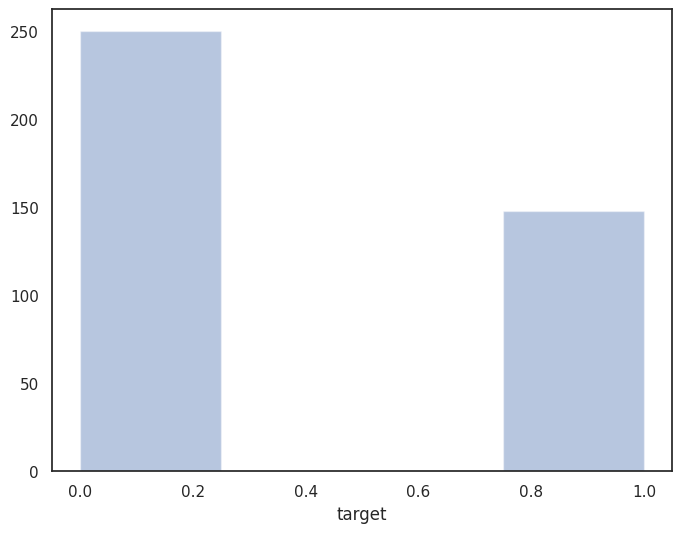

In [ ]:
f, axs = plt.subplots(10, 3, figsize=(20, 70))

for i, feat in enumerate(X_train.T):
    sns.distplot(feat[y_train == 0], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[0], len(y_train[y_train == 0])))
    sns.distplot(feat[y_train == 1], ax=axs.flat[i], label='{}: {}'.format(np.unique(df['diagnosis'])[1], len(y_train[y_train == 1])))
    axs.flat[i].set_title('{}: mean: {} std: {}'.format(list(df.iloc[:, 2:].columns)[i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()

plt.tight_layout()

    두 distplot이 많이 겹치는 변수들은 쓰기가 어렵다.
    그러나, 그건 단변량일 때의 경우이고, 다변량이 상호작용할 때도 같이 고려해야 한다.

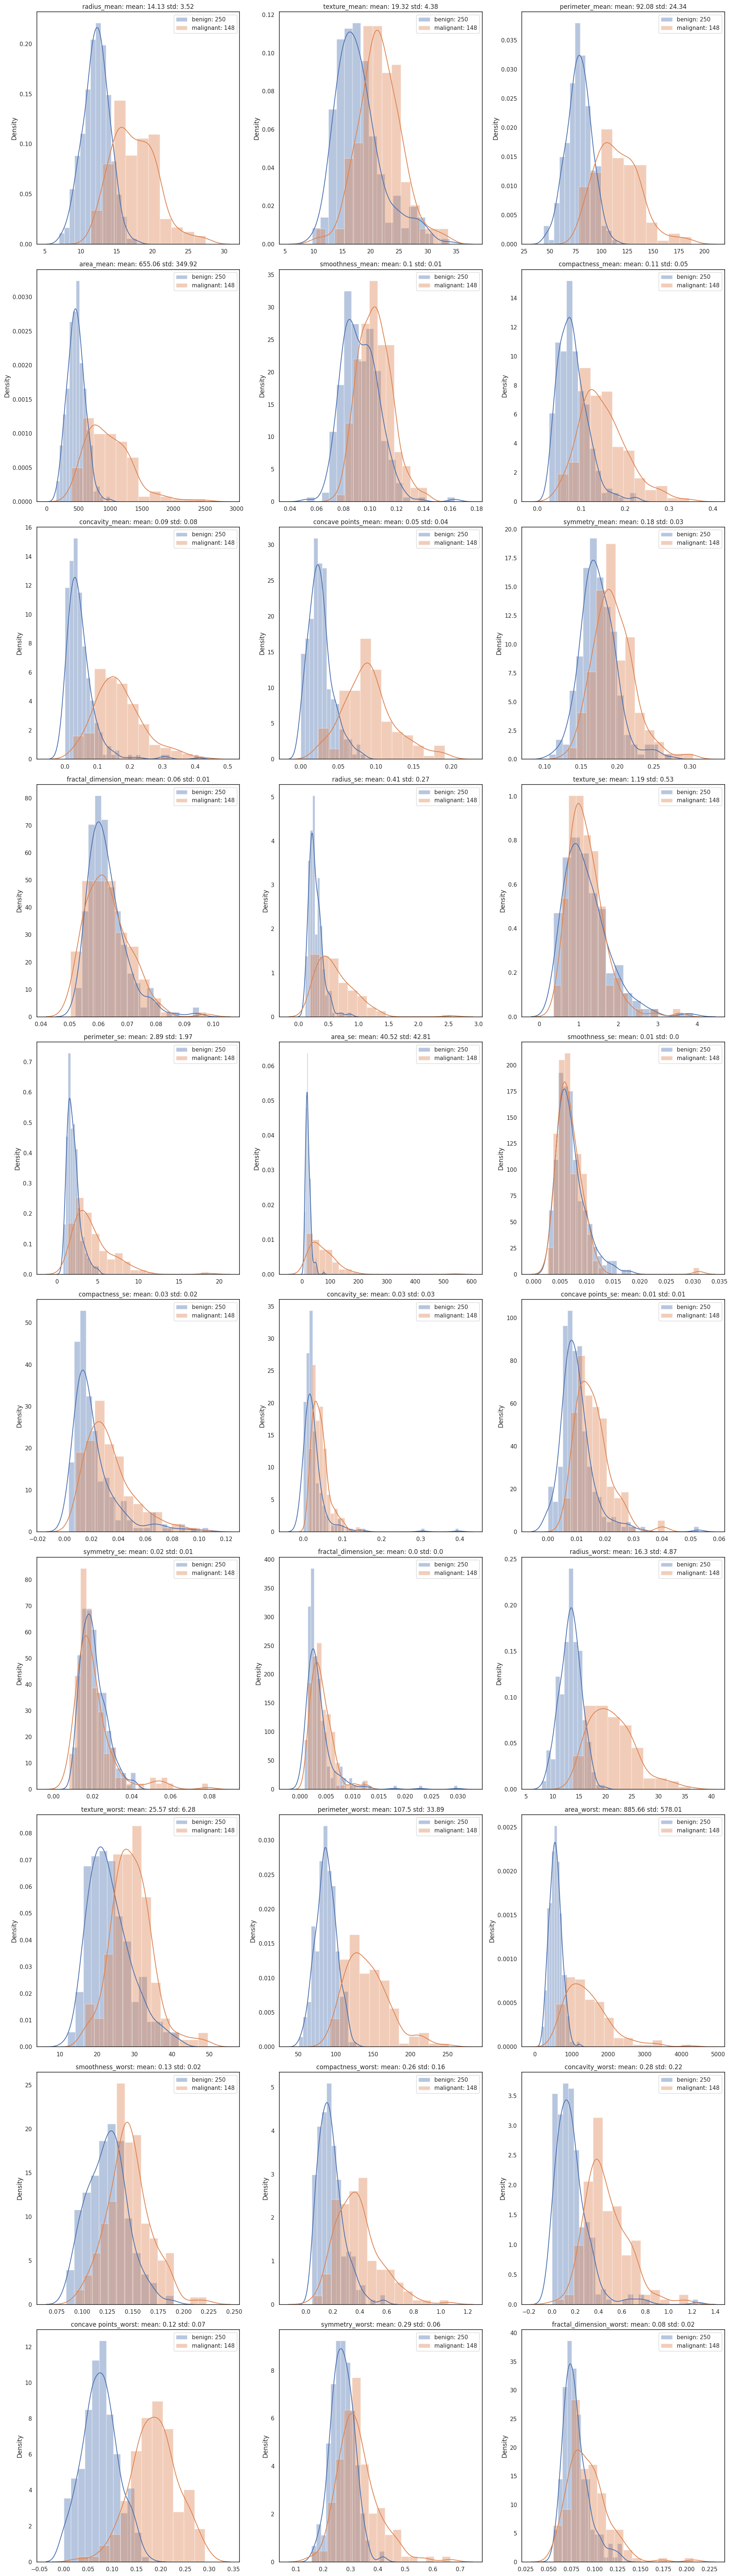

    그래서 Feature들 간의 연관성도 한 번 체크해줘야겠다 !

In [ ]:
plt.figure(figsize=(30, 30))

mask = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, fmt='.2g', mask=mask,
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=256))

plt.show()

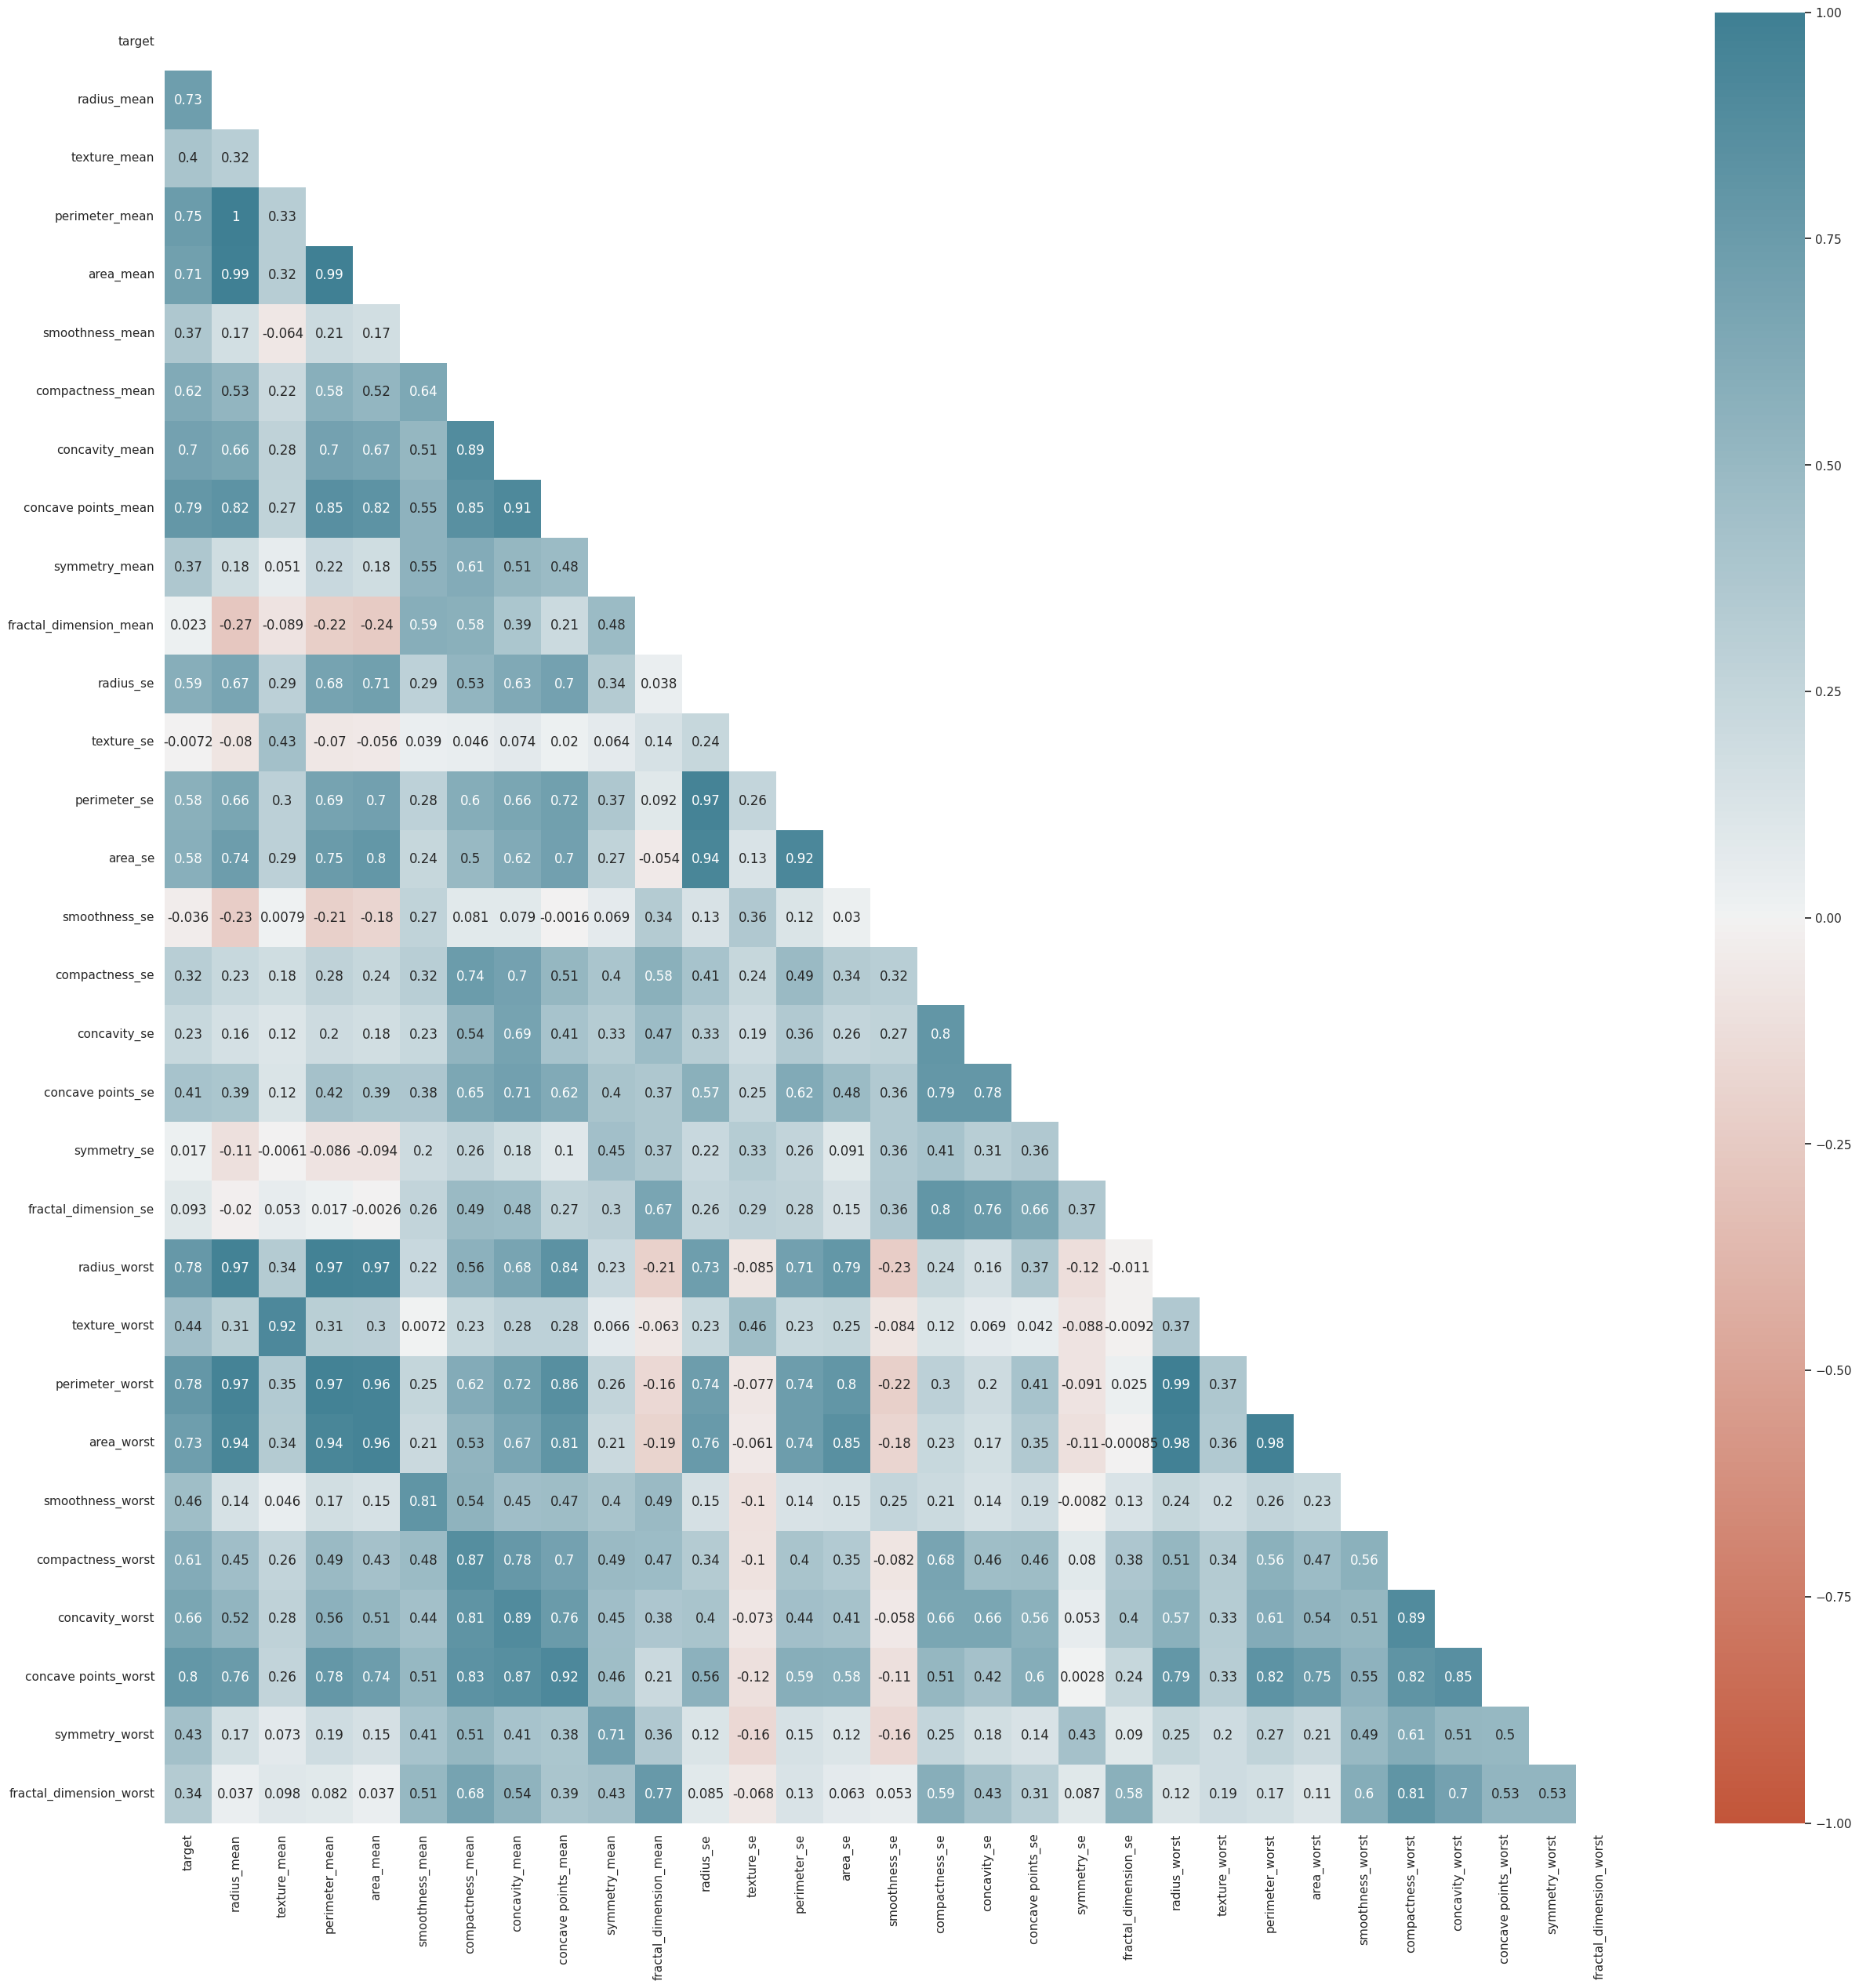

# 8. Feature Engineering(데이터 표준화)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    표준화를 진행해도 되는 이유는 같은 연산량을 곱하거나 나누거나 했을 때에도 데이터 고유의 특성은 변하지 않기 때문이다.



```
array([[-0.07699373, -0.54554994, -0.04583536, ...,  0.72538264,
         1.14141654,  1.18028318],
       [-1.15983315, -0.40847363, -1.1366859 , ..., -0.76186189,
        -0.02784157, -0.41722915],
       [ 1.61121262,  0.51222226,  1.54586145, ...,  0.97125715,
         0.25176363, -0.09456005],
       ...,
       [ 0.57100467, -1.01846321,  0.50226055, ..., -0.05223252,
        -0.21212682, -0.77320251],
       [ 1.332687  ,  0.60589107,  1.29934155, ...,  0.80536591,
         0.15167768, -0.06234774],
       [-0.35267726, -0.82655638, -0.32851151, ..., -0.21812375,
        -1.44969756, -0.7104158 ]])
```



# 9. 모델링

## 9.1. DummyClassifier